In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to load CSV data
def load_csv(file_path):
    return pd.read_csv(file_path)

# Function to interpolate data
def interpolate_data(data, num_points):
    linspace = np.linspace(0, len(data) - 1, num_points)
    interpolated_data = np.column_stack([
        np.interp(linspace, np.arange(len(data)), data['PointerPosX']),
        np.interp(linspace, np.arange(len(data)), data['PointerPosY']),
        np.interp(linspace, np.arange(len(data)), data['PointerPosZ'])
    ])
    return interpolated_data

# Function to calculate Euclidean distances
def calculate_distances(data1, data2):
    return np.linalg.norm(data1 - data2, axis=1)

# Main function for processing and plotting
def process_and_plot(paths):
    stats = {
        'Average Distance': [],
        'Maximum Distance': [],
        'Standard Deviation': []
    }

    for before_path, after_path in paths:
        # Load data
        data_before = load_csv(before_path)
        data_after = load_csv(after_path)
        
        # Determine the number of interpolation points
        num_points = max(len(data_before), len(data_after))
        
        # Interpolate data
        interpolated_before = interpolate_data(data_before, num_points)
        interpolated_after = interpolate_data(data_after, num_points)
        
        # Calculate distances
        distances = calculate_distances(interpolated_before, interpolated_after)
        
        # Gather statistics
        stats['Average Distance'].append(round(np.mean(distances),2))
        stats['Maximum Distance'].append(round(np.max(distances),2))
        stats['Standard Deviation'].append(round(np.std(distances),2))

    print(stats)
    stats_df = pd.DataFrame(stats)
    stats_df.to_csv('distances_statistics.csv', index=False)

    # Plotting the statistics
    fig, ax = plt.subplots(3, 1, figsize=(5, 8))
    ax[0].bar(range(len(stats['Average Distance'])), stats['Average Distance'], color='b', alpha=0.7)
    ax[0].set_title('Average Distance')
    ax[1].bar(range(len(stats['Maximum Distance'])), stats['Maximum Distance'], color='r', alpha=0.7)
    ax[1].set_title('Maximum Distance')
    ax[2].bar(range(len(stats['Standard Deviation'])), stats['Standard Deviation'], color='g', alpha=0.7)
    ax[2].set_title('Standard Deviation')

    plt.tight_layout()
    plt.show()

{'Average Distance': [0.03, 0.07, 0.07, 0.06, 0.1, 0.03, 0.12, 0.11, 0.05, 0.05], 'Maximum Distance': [0.07, 0.14, 0.21, 0.13, 0.21, 0.1, 0.2, 0.19, 0.1, 0.14], 'Standard Deviation': [0.02, 0.04, 0.05, 0.04, 0.06, 0.03, 0.06, 0.05, 0.03, 0.04]}


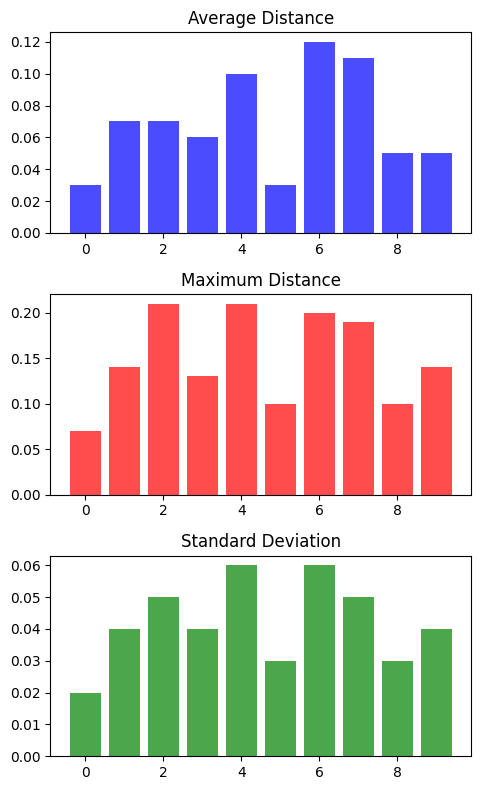

In [101]:

paths1 = [
    ("task1/CursorData_Before1.csv", "task1/CursorData1.csv"),
    ("task1/CursorData_Before2.csv", "task1/CursorData2.csv"),
    ("task1/CursorData_Before3.csv", "task1/CursorData3.csv"),
    ("task1/CursorData_Before4.csv", "task1/CursorData4.csv"),
    ("task1/CursorData_Before5.csv", "task1/CursorData5.csv"),
    ("task1/CursorData_Before6.csv", "task1/CursorData6.csv"),
    ("task1/CursorData_Before7.csv", "task1/CursorData7.csv"),
    ("task1/CursorData_Before8.csv", "task1/CursorData8.csv"),
    ("task1/CursorData_Before9.csv", "task1/CursorData9.csv"),
    ("task1/CursorData_Before10.csv", "task1/CursorData10.csv")
]
process_and_plot(paths1)

{'Average Distance': [0.19, 0.17, 0.11, 0.09, 0.13, 0.09, 0.17, 0.1, 0.09, 0.15], 'Maximum Distance': [0.35, 0.32, 0.31, 0.23, 0.44, 0.22, 0.45, 0.2, 0.22, 0.37], 'Standard Deviation': [0.11, 0.09, 0.08, 0.06, 0.13, 0.06, 0.15, 0.05, 0.06, 0.09]}


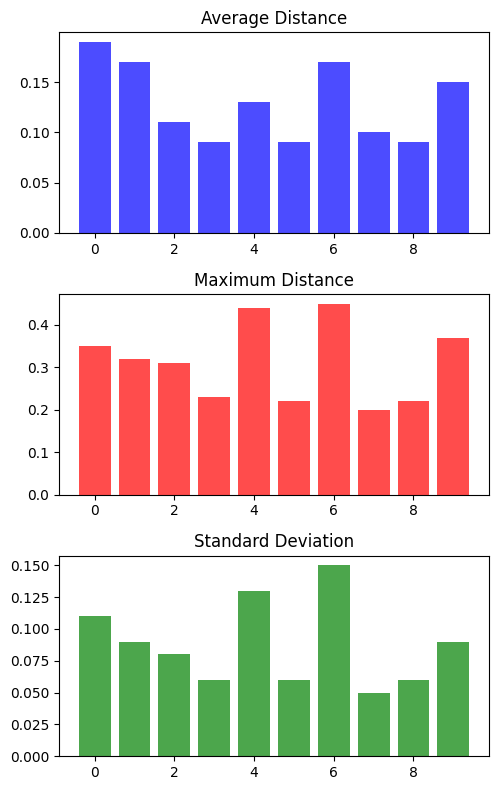

In [102]:
paths2 = [
    ("task2/CursorData_Before1.csv", "task2/CursorData1.csv"),
    ("task2/CursorData_Before2.csv", "task2/CursorData2.csv"),
    ("task2/CursorData_Before3.csv", "task2/CursorData3.csv"),
    ("task2/CursorData_Before4.csv", "task2/CursorData4.csv"),
    ("task2/CursorData_Before5.csv", "task2/CursorData5.csv"),
    ("task2/CursorData_Before6.csv", "task2/CursorData6.csv"),
    ("task2/CursorData_Before7.csv", "task2/CursorData7.csv"),
    ("task2/CursorData_Before8.csv", "task2/CursorData8.csv"),
    ("task2/CursorData_Before9.csv", "task2/CursorData9.csv"),
    ("task2/CursorData_Before10.csv", "task2/CursorData10.csv")
]
process_and_plot(paths2)

In [103]:

def calculate_angles(points):
    vectors = np.diff(points, axis=0)
    angles = []
    for i in range(len(vectors) - 1):
        vec1 = vectors[i]
        vec2 = vectors[i + 1]
        cos_theta = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
        cos_theta = np.clip(cos_theta, -1.0, 1.0)  # avoid numerical errors
        angle = np.arccos(cos_theta)
        angles.append(np.degrees(angle))
    return angles

def process_file_pairs(paths):
    avg_angles = []
    std_angles = []

    for before_path, after_path in paths:
        print(f"Processing pair: {before_path}, {after_path}")
        data_before = load_csv(before_path)
        data_after = load_csv(after_path)
        
        if data_before.empty or data_after.empty:
            print(f"Warning: Data at {before_path} or {after_path} is empty.")
            continue
        
        # Calculate angles
        angles_before = calculate_angles(data_before[['PointerPosX', 'PointerPosY', 'PointerPosZ']].values)
        angles_after = calculate_angles(data_after[['PointerPosX', 'PointerPosY', 'PointerPosZ']].values)
        
        print(f"Before angles: Average={round(np.mean(angles_before),2)}, Std={round(np.std(angles_before),2)}")
        print(f"After angles: Average={round(np.mean(angles_after),2)}, Std={round(np.std(angles_after),2)}")
        
        avg_angles.append((round(np.mean(angles_before),2), round(np.mean(angles_after),2)))
        std_angles.append((round(np.std(angles_before),2), round(np.std(angles_after),2)))

    return avg_angles, std_angles

def plot_results(avg_angles, std_angles):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))
    
    # Average angles
    axs[0].bar(np.arange(len(avg_angles)) * 2 - 0.2, [x[0] for x in avg_angles], width=0.4, label='Before')
    axs[0].bar(np.arange(len(avg_angles)) * 2 + 0.2, [x[1] for x in avg_angles], width=0.4, label='After')
    axs[0].set_title('Average Angle Between Vectors')
    axs[0].legend()

    # Standard deviations
    axs[1].bar(np.arange(len(std_angles)) * 2 - 0.2, [x[0] for x in std_angles], width=0.4, label='Before')
    axs[1].bar(np.arange(len(std_angles)) * 2 + 0.2, [x[1] for x in std_angles], width=0.4, label='After')
    axs[1].set_title('Standard Deviation of Angles')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

Processing pair: task1/CursorData_Before1.csv, task1/CursorData1.csv
Before angles: Average=11.03, Std=10.1
After angles: Average=9.21, Std=5.41
Processing pair: task1/CursorData_Before2.csv, task1/CursorData2.csv
Before angles: Average=13.24, Std=11.02
After angles: Average=9.47, Std=3.92
Processing pair: task1/CursorData_Before3.csv, task1/CursorData3.csv
Before angles: Average=12.28, Std=13.71
After angles: Average=12.64, Std=6.55
Processing pair: task1/CursorData_Before4.csv, task1/CursorData4.csv
Before angles: Average=14.37, Std=14.54
After angles: Average=10.25, Std=7.18
Processing pair: task1/CursorData_Before5.csv, task1/CursorData5.csv
Before angles: Average=12.5, Std=11.06
After angles: Average=8.66, Std=4.13
Processing pair: task1/CursorData_Before6.csv, task1/CursorData6.csv
Before angles: Average=14.6, Std=13.31
After angles: Average=7.45, Std=5.03
Processing pair: task1/CursorData_Before7.csv, task1/CursorData7.csv
Before angles: Average=12.58, Std=13.02
After angles: Av

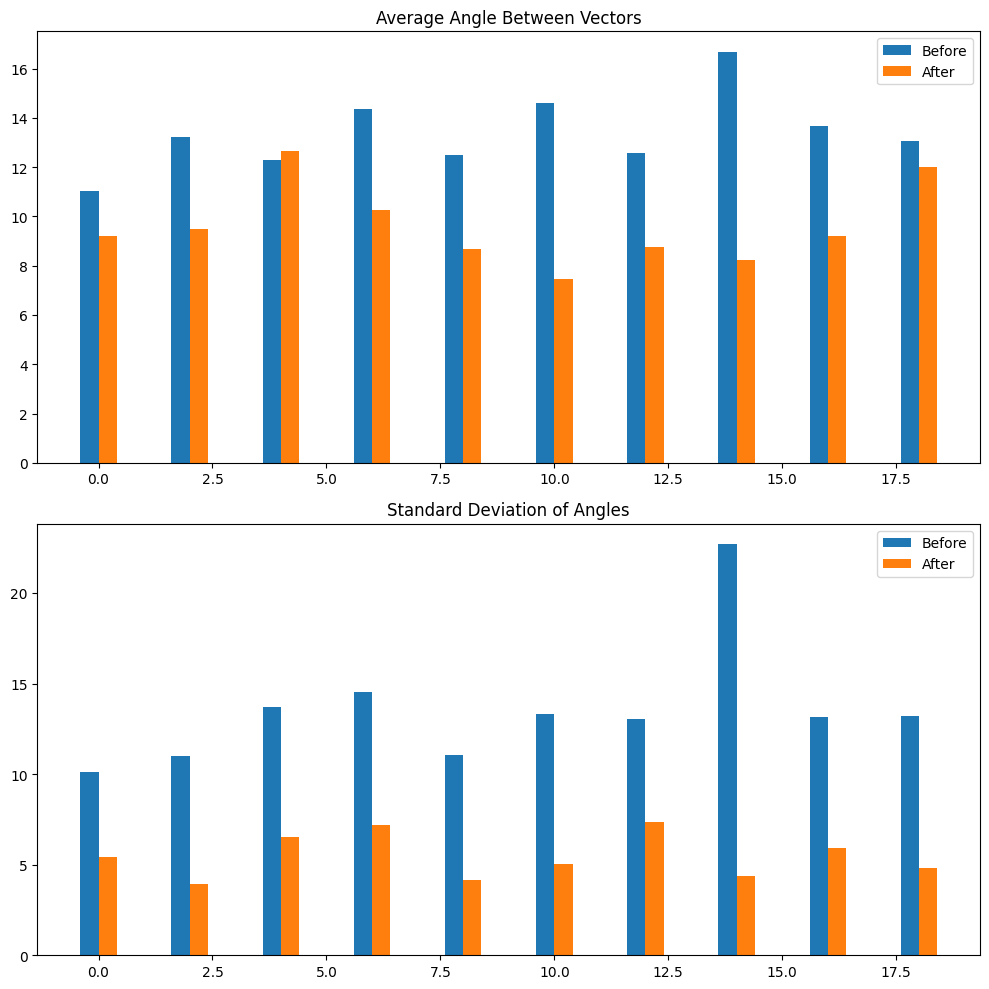

In [104]:
# Process files and plot results
avg_angles, std_angles = process_file_pairs(paths1)
plot_results(avg_angles, std_angles)

Processing pair: task2/CursorData_Before1.csv, task2/CursorData1.csv
Before angles: Average=12.47, Std=11.68
After angles: Average=12.68, Std=6.02
Processing pair: task2/CursorData_Before2.csv, task2/CursorData2.csv
Before angles: Average=15.36, Std=14.98
After angles: Average=13.89, Std=7.85
Processing pair: task2/CursorData_Before3.csv, task2/CursorData3.csv
Before angles: Average=13.37, Std=14.07
After angles: Average=12.75, Std=9.78
Processing pair: task2/CursorData_Before4.csv, task2/CursorData4.csv
Before angles: Average=12.51, Std=12.83
After angles: Average=12.76, Std=7.35
Processing pair: task2/CursorData_Before5.csv, task2/CursorData5.csv
Before angles: Average=17.45, Std=20.19
After angles: Average=14.41, Std=9.2
Processing pair: task2/CursorData_Before6.csv, task2/CursorData6.csv
Before angles: Average=18.39, Std=18.05
After angles: Average=15.23, Std=8.0
Processing pair: task2/CursorData_Before7.csv, task2/CursorData7.csv
Before angles: Average=15.75, Std=15.9
After angles

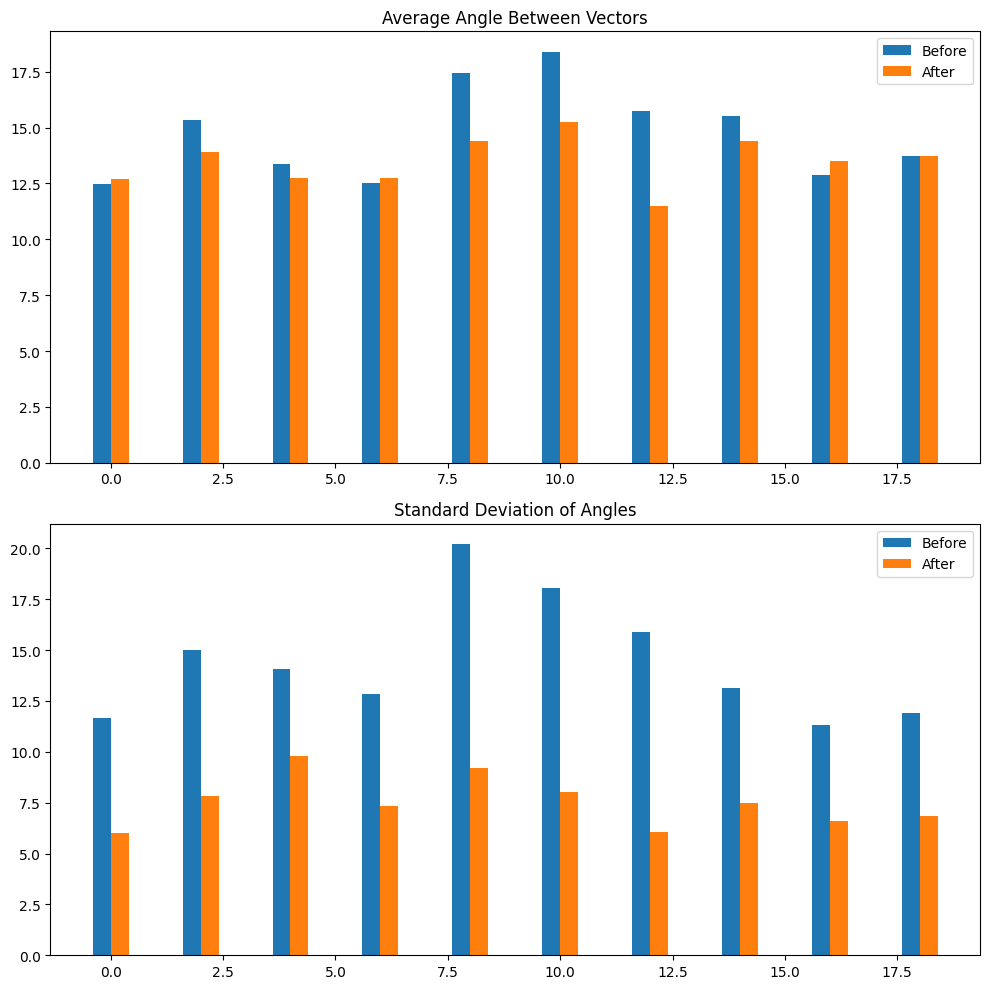

In [105]:
# Process files and plot results
avg_angles, std_angles = process_file_pairs(paths2)
plot_results(avg_angles, std_angles)

In [106]:

# Generate the data
avg_angles1, std_angles1 = process_file_pairs(paths1)

# Create DataFrame from the results
angles_df1 = pd.DataFrame({
    'Avg_Angle_Before': [x[0] for x in avg_angles1],
    'Avg_Angle_After': [x[1] for x in avg_angles1]
})

angles_df2 = pd.DataFrame({
    'Std_Angle_Before': [x[0] for x in std_angles1],
    'Std_Angle_After': [x[1] for x in std_angles1]
})


# Save the DataFrame to a CSV file
angles_df1.to_csv('angles_results_avg_1.csv', index=False)
angles_df2.to_csv('angles_results_std_1.csv', index=False)

avg_angles2, std_angles2 = process_file_pairs(paths2)
angles_df3 = pd.DataFrame({
    'Avg_Angle_Before': [x[0] for x in avg_angles2],
    'Avg_Angle_After': [x[1] for x in avg_angles2]
})

angles_df4 = pd.DataFrame({
    'Std_Angle_Before': [x[0] for x in std_angles2],
    'Std_Angle_After': [x[1] for x in std_angles2]
})


# Save the DataFrame to a CSV file
angles_df3.to_csv('angles_results_avg_2.csv', index=False)
angles_df4.to_csv('angles_results_std_2.csv', index=False)


Processing pair: task1/CursorData_Before1.csv, task1/CursorData1.csv
Before angles: Average=11.03, Std=10.1
After angles: Average=9.21, Std=5.41
Processing pair: task1/CursorData_Before2.csv, task1/CursorData2.csv
Before angles: Average=13.24, Std=11.02
After angles: Average=9.47, Std=3.92
Processing pair: task1/CursorData_Before3.csv, task1/CursorData3.csv
Before angles: Average=12.28, Std=13.71
After angles: Average=12.64, Std=6.55
Processing pair: task1/CursorData_Before4.csv, task1/CursorData4.csv
Before angles: Average=14.37, Std=14.54
After angles: Average=10.25, Std=7.18
Processing pair: task1/CursorData_Before5.csv, task1/CursorData5.csv
Before angles: Average=12.5, Std=11.06
After angles: Average=8.66, Std=4.13
Processing pair: task1/CursorData_Before6.csv, task1/CursorData6.csv
Before angles: Average=14.6, Std=13.31
After angles: Average=7.45, Std=5.03
Processing pair: task1/CursorData_Before7.csv, task1/CursorData7.csv
Before angles: Average=12.58, Std=13.02
After angles: Av